# <center>Breast cancer biopsy diagnosis using Support Vector Machine classifier</center>


<center>Histopathology images of cell nuclei. Biopsy samples taken from breast tissue using FNA.</center>


<img src="FNA_breast_tissue.jpeg"/>




<font size=2 color=grey>Sizilio, Glaucia & Leite, Cicilia & Mg Guerreiro, Ana & Neto, Adriao Duarte. (2012). Fuzzy method for pre-diagnosis of breast cancer from the Fine Needle Aspirate analysis. Biomedical engineering online. 11. 83. </font>

# <font color=blue>Aim:</font>

We want a model to learn to predict **Benign** or **Malignant** for histopathology breast tumour biopsies.





# <font color=blue>Dataset:</font>

Dataset located at: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic%29

Dataset contains 10 measurements (_features_) giving info about the cell nuclei obtained from the biopsy:

    a) radius (mean of distances from center to points on the perimeter) 
    b) texture (standard deviation of gray-scale values) 
    c) perimeter 
    d) area 
    e) smoothness (local variation in radius lengths) 
    f) compactness (perimeter^2 / area - 1.0) 
    g) concavity (severity of concave portions of the contour) 
    h) concave points (number of concave portions of the contour) 
    i) symmetry 
    j) fractal dimension ("coastline approximation" - 1)
    
Dataset contains additional 20 derived features (mean, standard error, and "worst" i.e. mean of the three largest values) giving a total of 30 features.

All of the examples in the dataset are _labelled_ with the "correct" diagnosis: B for benign and M for malignant.

# <font color=blue>Data science approach:</font>

    1) Import libraries
    2) Import data
    3) Exploratory data analysis
    4) Create model
    5) Evaluate model
    Go back to steps 3 or 4

-----------

## 1) Import libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 2) Get data

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

## 3) Exploratory data analysis

### 3.1) What format does our dataset currently exist in 

In [4]:
type(cancer)

sklearn.utils.Bunch

From the above we see that the sklearn version of the dataset exists as a base.Bunch - a 'dictionary-like' format.


### 3.2) What features (column headings) have we got?

We can see parent level elements using .keys()... 

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

We can access the keys using typical pandas referencing...

In [6]:
cancer['target_names']

array(['malignant', 'benign'],
      dtype='<U9')

Alternatively, we can also access like this (if no spaces present)...

In [7]:
cancer.target_names

array(['malignant', 'benign'],
      dtype='<U9')

Let's look at the dataset by means of the keys...

In [8]:
cancer.keys() 

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

We wrap each key with print() function to display info nicely...

In [9]:
print(cancer['DESCR']) # shift o toggle

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [10]:
print(cancer['data'])

[[  1.79900000e+01   1.03800000e+01   1.22800000e+02 ...,   2.65400000e-01
    4.60100000e-01   1.18900000e-01]
 [  2.05700000e+01   1.77700000e+01   1.32900000e+02 ...,   1.86000000e-01
    2.75000000e-01   8.90200000e-02]
 [  1.96900000e+01   2.12500000e+01   1.30000000e+02 ...,   2.43000000e-01
    3.61300000e-01   8.75800000e-02]
 ..., 
 [  1.66000000e+01   2.80800000e+01   1.08300000e+02 ...,   1.41800000e-01
    2.21800000e-01   7.82000000e-02]
 [  2.06000000e+01   2.93300000e+01   1.40100000e+02 ...,   2.65000000e-01
    4.08700000e-01   1.24000000e-01]
 [  7.76000000e+00   2.45400000e+01   4.79200000e+01 ...,   0.00000000e+00
    2.87100000e-01   7.03900000e-02]]


In [11]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [12]:
print(cancer['target']) # malignant = 0, benign = 1

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [13]:
print(cancer['target_names'])

['malignant' 'benign']


From the above we would assume that malignant = 0 and benign = 1.  (This info isn't explicitly stated in dataset description.)  Let's verify.  We know from description that there are that there are 357 benign cases.  If benign =1, then summing the target variables will give us 357.  Let's confirm this is the case...

In [14]:
sum(cancer.target)

357

### 3.3) Put data into dataframe format

Let's create a dataframe for the dataset feature variables (leaving out the target data) ...

In [15]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names']) 

### 3.4) Look at structure of data

In [16]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

From the above, we can verify: 

    There are 30 features.
    All are floats.
    There are no missing values.
    There are no NaNs.

In [19]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Looking at the above, we might ask if some of these features should be optimised to help the algorithm converge.  However for now, we'll go with the simplest approach first and just use the data 'as is'.

In [20]:
data_and_labels_df = df.assign(Benign = cancer['target']) # make a new df that has the labels
data_and_labels_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Benign
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


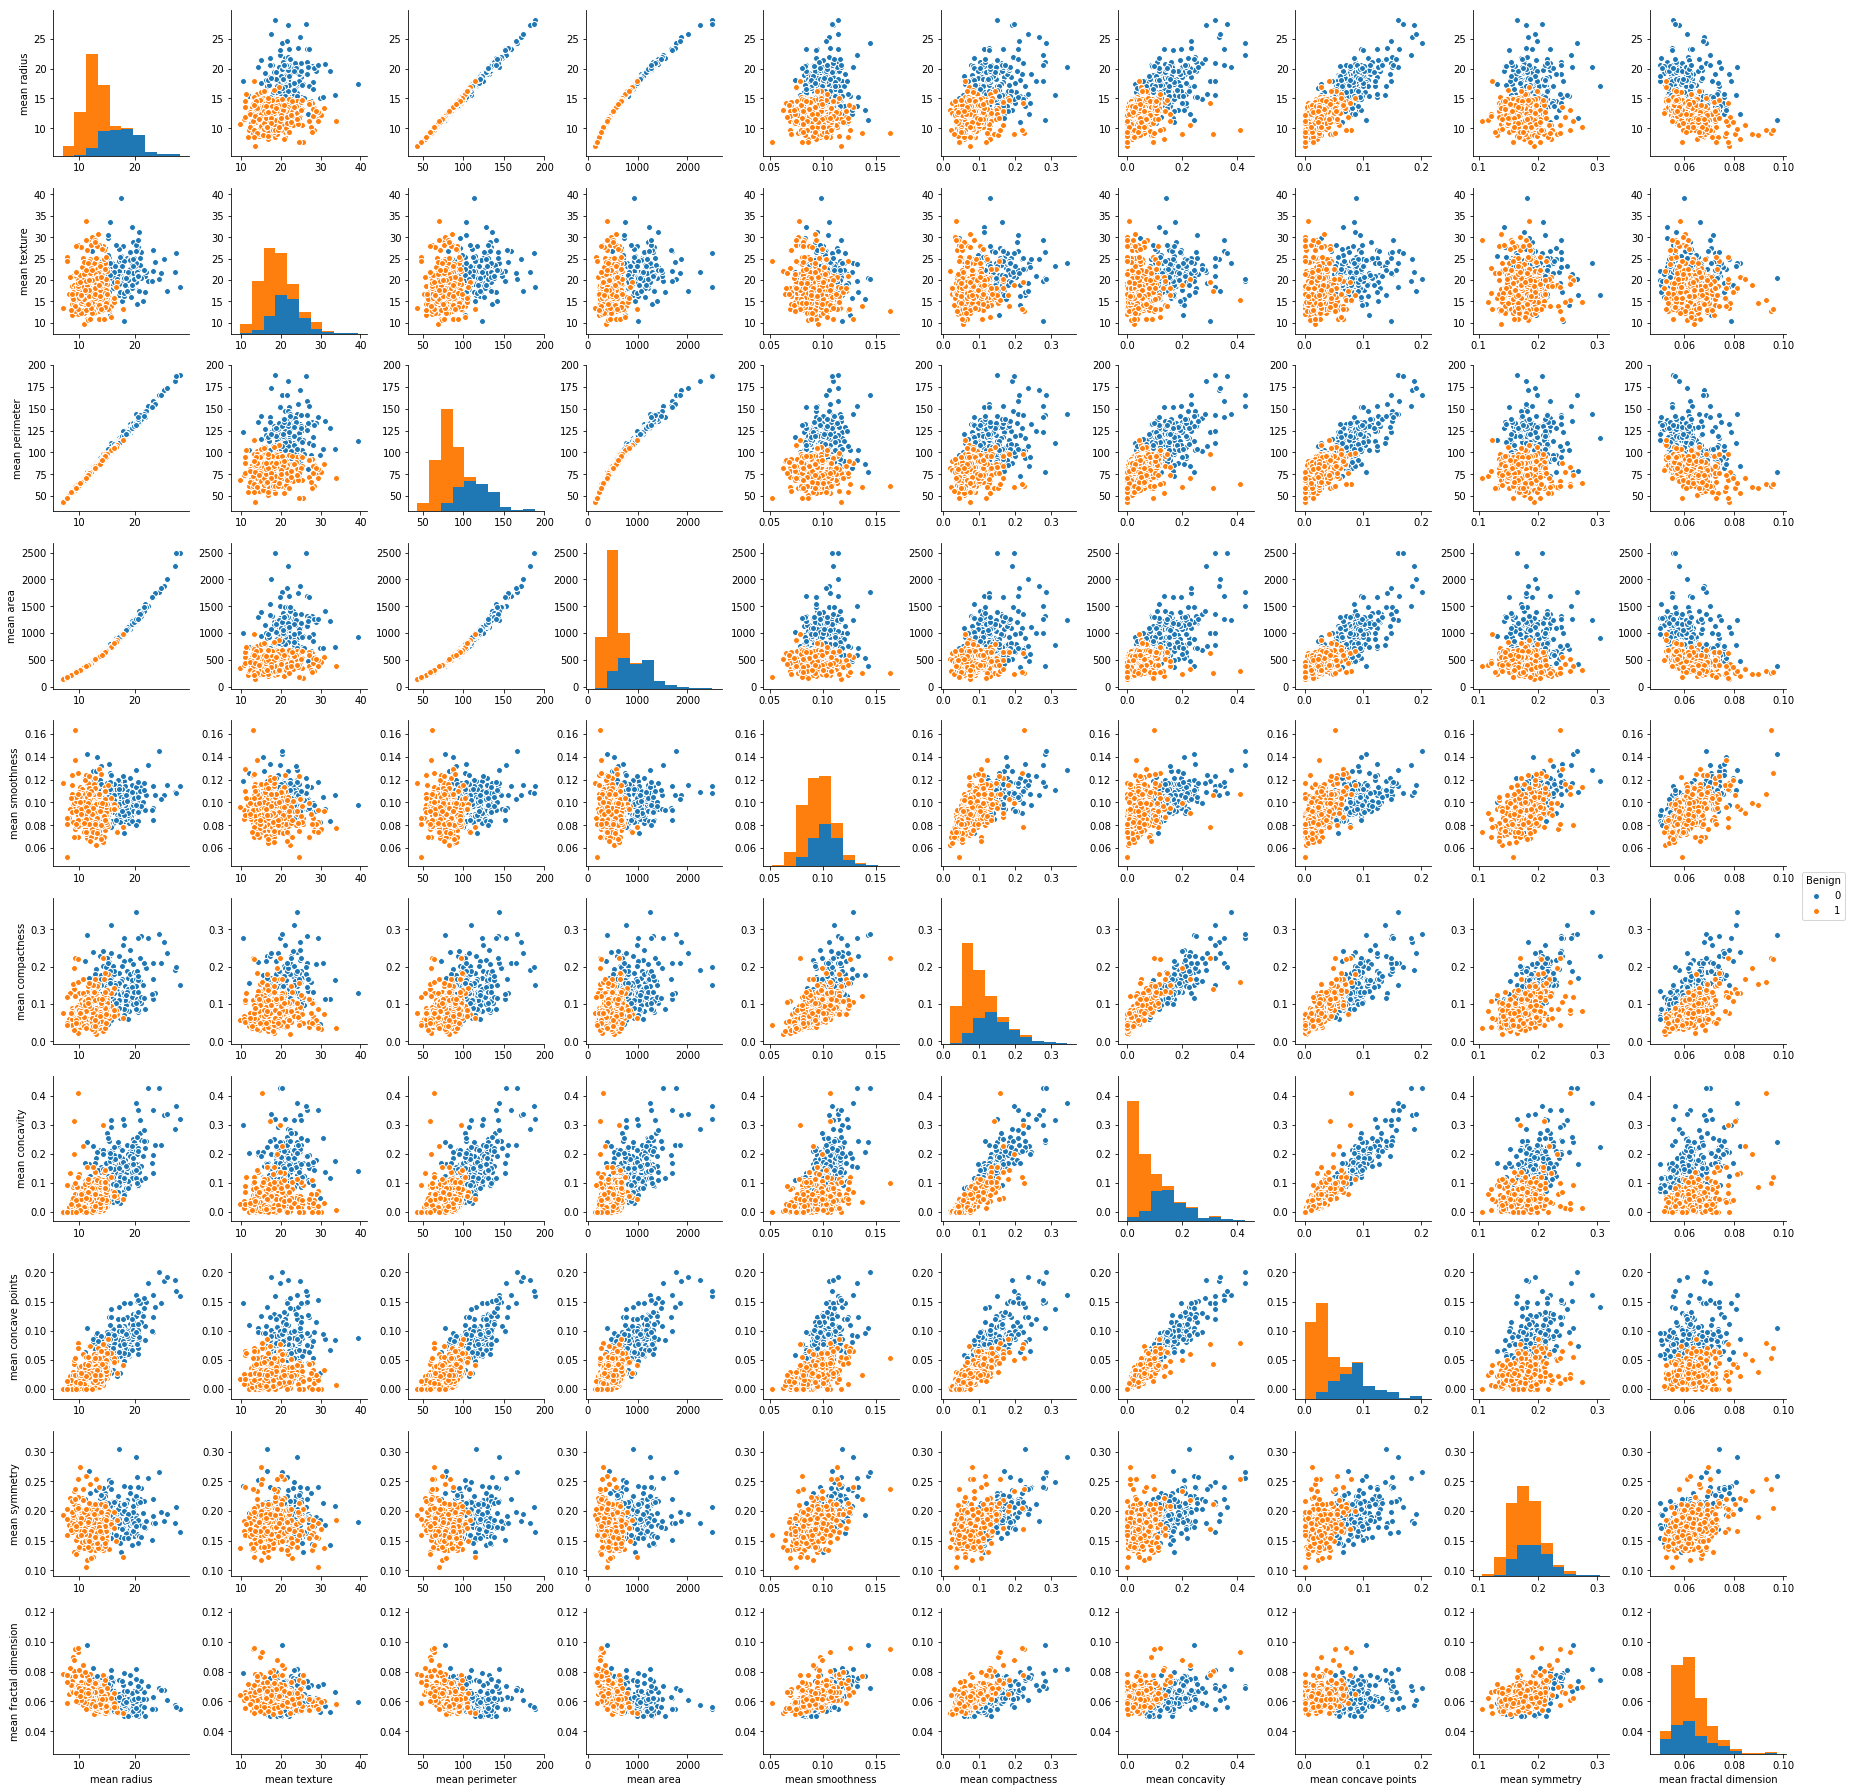

In [21]:
g = sns.pairplot(data_and_labels_df, vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension'], hue='Benign')

In [22]:
coeffs = df.corr() # Find out correlation coefficients
coeffs

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


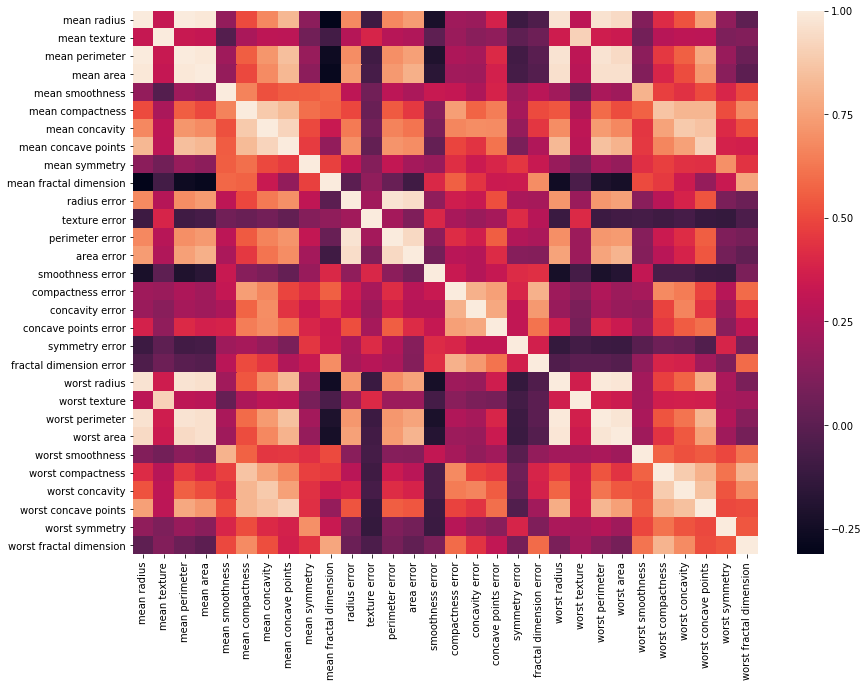

In [23]:
plt.rcParams['figure.figsize']=14,10
ax = sns.heatmap(coeffs, annot=False)


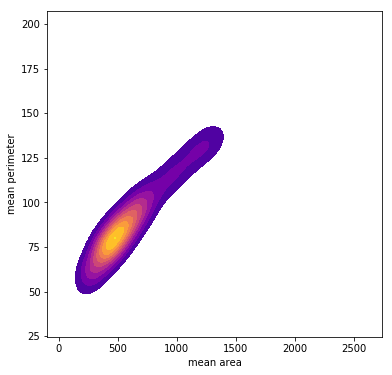

In [24]:
plt.rcParams['figure.figsize']=6,6
#sns.jointplot(data_and_labels_df['mean texture'], df['mean perimeter'], kind ='kde', color='red')
sns.kdeplot(data_and_labels_df['mean area'], df['mean perimeter'], shade=True, cmap='plasma', shade_lowest=False)

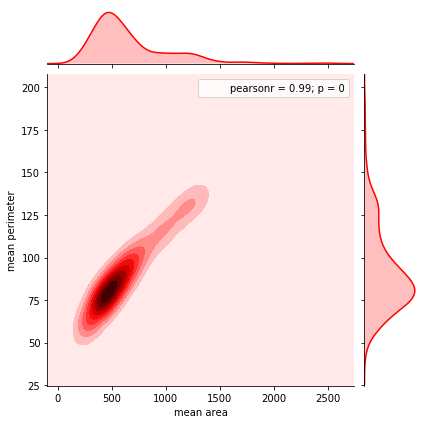

In [25]:
sns.jointplot(data_and_labels_df['mean area'], df['mean perimeter'], kind ='kde', color='red', )

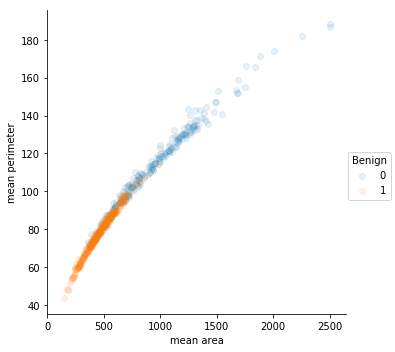

In [26]:
plt.figure(figsize=(24,24))
sns.lmplot(x='mean area', y='mean perimeter', hue='Benign', data=data_and_labels_df, fit_reg=False, scatter_kws={'alpha':0.1})

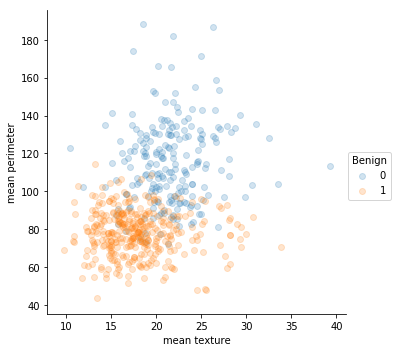

In [27]:
plt.figure(figsize=(24,24))
sns.lmplot(x='mean texture', y='mean perimeter', hue='Benign', data=data_and_labels_df, fit_reg=False, scatter_kws={'alpha':0.2})

## 4) Create model 

### 4.1) Pull data into suitable structure for building model

Let's create our X matrix and y target data...

In [28]:
X = df # We know this is a dataframe
y = cancer.target # Let's see what type this is
type(y)

numpy.ndarray

### 4.2) Split data into separate training and test datasets

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### <font color=green>4.3) Call our machine learning model, in this case Support Vector Machine (SVM)

<font color=green>Import and support vector machine class and instantiate...</font>

In [31]:
from sklearn.svm import SVC
classifier = SVC()

### <font color=green>4.4) Train model</font>

<font color=green>Fit machine learning model to training data...</font>

In [32]:
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## 5) Evaluate model

### 5.1) Make predictions on test set (model has not seen this data yet)



In [33]:
y_pred = classifier.predict(X_test)

In [34]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### 5.2) See how well predictions match our known results

Call tools...

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

Assess performance using confusion matrix...

In [36]:
print(confusion_matrix(y_test, y_pred)) # col headings malignant (Class 0) benign (Class 1)

[[  0  66]
 [  0 105]]


From the confusion matrix, we note the following:

    There are 66 actual class 0 (malignant) 
    There are 105 actual class 1 (benign)
    
It seems that our SVM is classifying everything as benign.  All actual class 0 (malignant) are coming out as false positives.  Let's look at the precision and recall...

Assess performance using Precision, Recall and F1 score metrics...

In [37]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        66
          1       0.61      1.00      0.76       105

avg / total       0.38      0.61      0.47       171



/Users/steve.miller/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


As expected, for class 1 (benign) recall = 1 (100%) because the SVM is actually finding _all_ the benign cases, but it is only doing this by classifying every sample as benign, i.e. it is also pulling in _all_ malignant cases (lots of false positives), so it's precision for this class is poor.

Recall for class 0 (malignant) is zero because the SVM is unable to find these cases 

Obviously this is a very serious failing for a cancer detection system.  Where positive corresponds to benign, we would prefer false negatives (incorrectly diagnosing benign as malignant) rather than false positives (incorrectly classifying malignant cancers as benign - i.e. failing to spot malignant cancer)

We need to adjust the parameters of the SVM (and perhaps consider normalising data).


--------------

# <font color=blue>Data science is an exploratory and iterative process</font><br>

## <font color=blue> -  Standard process is:   First, establish a functional model</font> 

## <font color=blue> -  This will give you a steer on what to focus on next</font>

---------------

Next steps, in this case... search for best model hyperparameters using sklearn's GridSearch

## 4 +) Create model 

In [38]:
from sklearn.model_selection import GridSearchCV

GridSearchCV takes in dict (or list of dicts) 
the dict contains parameter names as keys and parameter settings as values
GridSearch then uses these various hyperparameter values to train multiple SVMs

So...
keys = params, values = list of settings to test.

We know the parameters from looking at help for our instantiation call: classifier = SVC() 

Here we will try a Grid based on a range of C and gamma values.

C in SVM is the penalty for misclassifying. High C value corresponds to strict margin.  Relaxing may help. <br>
**Large C = low bias, high variance** ,so model is strictly trained to training data - overfitted - and can't generalise to test data).

Gamma is the kernel coefficient (or it is when kernel is default = radial basis function).  It defines how far the influence a single training example reaches.  Intuitively, if gamma is high then each example exerts far recahing influence and gives potential for overfittig (high variance)  Thus gamma works in reverse way to C: <br> 
**Large gamma = High bias** , biased to model, rather than data, and thus low variance (low overfitting). 

Let's define a parameter grid to explore the function of the SVM given a range of C and gamma parameters...

In [39]:
param_grid ={'C':[0.1, 1, 10, 100, 1000],
            'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}

Instantiate a GridSearch object with our classifier and parameter grid...

In [40]:
grid = GridSearchCV(SVC(), param_grid, verbose=3)

### 4.1 +) Train (multiple) models

Train multiple SVMs...

In [41]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] .......... C=0.1, gamma=1, score=0.631578947368421, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] .......... C=0.1, gamma=1, score=0.631578947368421, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.6363636363636364, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ........ C=0.1, gamma=0.1, score=0.631578947368421, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ........ C=0.1, gamma=0.1, score=0.631578947368421, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.6363636363636364, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ....... C=0

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............ C=1, gamma=1, score=0.631578947368421, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ............ C=1, gamma=1, score=0.631578947368421, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........... C=1, gamma=1, score=0.6363636363636364, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] .......... C=1, gamma=0.1, score=0.631578947368421, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] .......... C=1, gamma=0.1, score=0.631578947368421, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......... C=1, gamma=0.1, score=0.6363636363636364, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ......... C=1, gamma=0.01, score=0.631578947368421, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

Let's see what the grid search believes are the best hyperparameter values...

In [42]:
grid.best_params_ # C is increased to 10 instead of default 1.  Gamma is reduced to 0.0001 instead default 1/n

{'C': 10, 'gamma': 0.0001}

We can also pull out the score (gridsearch allocates a cross validation type score to each classifier in the grid)...

In [43]:
grid.best_score_

0.95477386934673369

So this is what the classifier (estimator) looks like...

In [44]:
grid.best_estimator_  

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

_grid_ is used above to refer to the highest scoring classifier.  We can take _grid_ and use it as our new (tuned) classifier

## 5 +) Re-evaluation - based on our gridsearch tuned classifier

In [45]:
grid_pred = grid.predict(X_test)

In [46]:
grid_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

In [47]:
print(confusion_matrix(y_test, grid_pred))

[[ 60   6]
 [  3 102]]


We see a marked improvement comparing the above confusion matrix to our previous one. 9 out of 171 samples are misclassified (~5% misclassification)

As before, we note:

    There are 60 + 6 = 66 actual class 0 (malignant)
    There are 3 + 102 = 105 actual class 1 (benign)

However now we see that our SVM correctly finds 60 of the malignant tumours, a big improvement over our earlier SVM but unfortunately it classifies 6 malignant tumours as benign (false positives).  For cancer detection, this would be a worrying performance issue.

There are 3 false negatives, which, given our labeling, corresponds to: benigns classed as malignant.  This would be acceptable in cancer detection. 

In [48]:
print( classification_report(y_test, grid_pred))

             precision    recall  f1-score   support

          0       0.95      0.91      0.93        66
          1       0.94      0.97      0.96       105

avg / total       0.95      0.95      0.95       171



**Class 0 = Malignant** <br>
**Class 1 = Benign**

For class 0 (malignant), we have a recall of 0.91.  Whilst an improvement over earlier SVM, maximising this metric would be a priority in cancer detection.  The quality of the recall is high - precision = 0.95 - only a few benigns have been classed as malignant.

For class 1 (benign), we have a recall of 0.97.  Most of the benigns are found.  Unfortunately as mentioned, **we are also pulling in some malignants here** hence our precision is not as high as we would like.  We would aspire to have the precision here = 1 (and recall for class 0 = 1) an aspiration which may require us to accept more benigns detected as malignant.

# Next iteration

- Further work to improve the recall for class 0 based on revisting the second and third best SVMs from the grid.  (The grid's scoring system may have different priorities to our requirements.)  

- Test effect of scaling the features. 

## --> Return to step 3